In [14]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [15]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [16]:
class_mapping = {0: "shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9:"Ankle boot"}

### Visualize 5 random images from the data

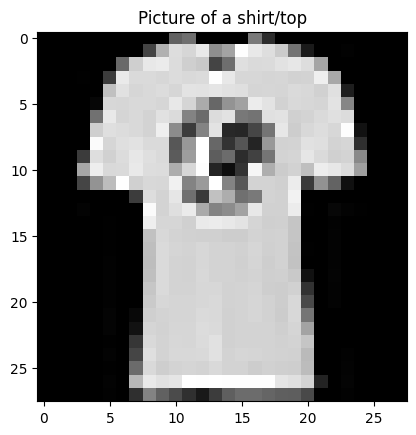

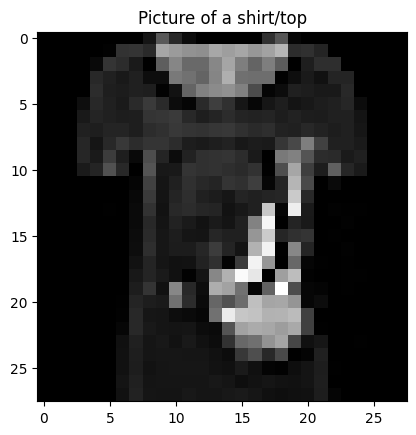

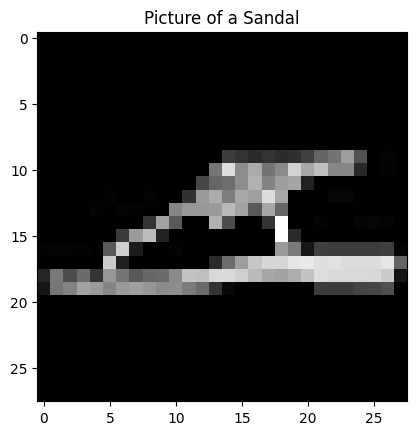

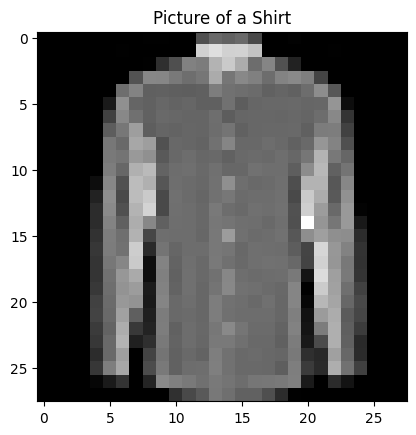

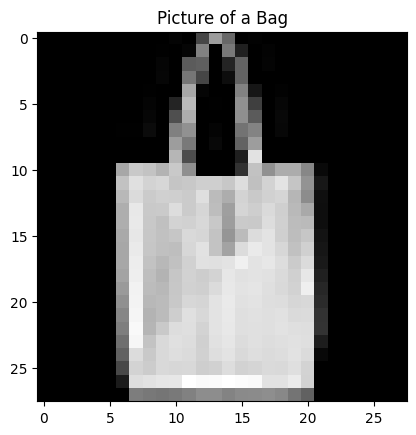

In [17]:
choices = np.random.randint(1, X_train.shape[0], 5)
for i in choices:
  plt.imshow(X_train[i], cmap='gray')
  plt.title(f'Picture of a {class_mapping[y_train[i]]}')
  plt.show();

### Flatten the array and divide by 255 to bring each pixel value between 0 and 1

In [18]:
X_train_new = []
for x in X_train:
  x = x.ravel()/255
  X_train_new.append(x)

X_train_new = np.array(X_train_new)

### Forward pass class

In [76]:
class ForwardPass:
  def __init__(self, n_inputs, n_outputs, neurons_in_hidden_layers):
    """
    Does forward pass for classification problem for a given input, with random weight initlialization
    Arguments:
      n_inputs = No of features in the input data
      n_outputs = No of output classes
      neurons_in_hidden_layers = List with the number of neurons in each hidden layer
    """
    self.neurons_in_hidden_layers = [n_inputs] + neurons_in_hidden_layers
    self.n_inputs = n_inputs
    self.n_outputs = n_outputs
    self.W = []
    self.B = []
    self._weight_initialization()

  def _sigmoid(self, z):
    """
    Calculates sigmoid function
    """
    return np.exp(z)/ (1 + np.exp(z))

  def _weight_initialization(self):
    """
    Initializes weights.
    Called inside the constructor
    """
    self.neurons_in_hidden_layers = self.neurons_in_hidden_layers
    for i in range(1,len(self.neurons_in_hidden_layers)):
      prev_layer = self.neurons_in_hidden_layers[i-1]
      curr_layer = self.neurons_in_hidden_layers[i]
      self.W.append(np.random.randn(curr_layer, prev_layer))
      self.B.append(np.random.randn(curr_layer, 1))

  def predict(self, output):
    """
    Predicts class value(s) for given input(s)
    """
    output = np.exp(output)
    output = output/output.sum(axis=0)
    return output.argmax(axis=0)

  def forward_pass(self, X):
    """
    Does a single forward pass on the data
    Returns the output probabilities corresponding to each class
    """
    output = X_train_new.T
    for layer in range(1,len(self.neurons_in_hidden_layers)):
      w = self.W[layer-1]
      b = self.B[layer-1]
      curr_a = np.dot(w, output) + b
      curr_h = self._sigmoid(curr_a)
      output = curr_h
    return self.predict(output)

In [79]:
fp = ForwardPass(n_inputs = X_train_new.shape[1], n_outputs = 10, neurons_in_hidden_layers = [4,3])
fp.forward_pass(X_train_new)

array([0, 0, 0, ..., 0, 0, 2])